<a href="https://colab.research.google.com/github/1804054Miraz/My_Thesis_Work/blob/main/Lab_9_2_EEG_features_extraction_for_200_data_and_apply_LogisticRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import os
import glob

In [2]:
alcoholic_path = "/content/drive/MyDrive/Dataset/EEG_FULL/New_alcoholic/"
alcoholic = []
csv_file_count = {}
i=0
for directory_name in os.listdir(alcoholic_path):
  directory_path = os.path.join(alcoholic_path, directory_name)

  if os.path.isdir(directory_path):
    csv_files = [file for file in os.listdir(directory_path) if file.endswith('.csv')]
    for file in csv_files:
      # print(directory_path+'/'+file)
      file_path = (directory_path+'/'+file)
      alcoholic.append(file_path)


In [3]:
non_alcoholic_path = "/content/drive/MyDrive/Dataset/EEG_FULL/Transfer_new_non_alcoholic/"
non_alcoholic = []

for directory_name in os.listdir(non_alcoholic_path):
  directory_path = os.path.join(non_alcoholic_path, directory_name)

  if os.path.isdir(directory_path):
    csv_files = [file for file in os.listdir(directory_path) if file.endswith('.csv')]
    for file in csv_files:
      file_path = (directory_path+'/'+file)
      non_alcoholic.append(file_path)

In [4]:
import numpy as np
import pandas as pd
import statistics as st
import scipy.stats as scst
from scipy.stats import skew
from scipy.stats import kurtosis
from scipy.stats import entropy
from scipy.stats import normaltest

In [5]:
length = sum(1 for _ in alcoholic)
print("Length of the list:", length)

length = sum(1 for _ in non_alcoholic)
print("Length of the list:", length)


Length of the list: 3811
Length of the list: 3811


In [6]:
EEG_Features=pd.DataFrame(columns=['MAX', 'MIN', 'MEAN', 'STD', 'VAR', 'SKW', 'KUR', 'SE', 'LEE', 'PPA','RMS', 'label'])

In [7]:
def find_SE(df):
  def shannon_entropy(column):
      # Convert the column to a numpy array
      values = np.array(column)

      # Ensure all values are non-negative
      values -= np.min(values)

      # Convert to integers
      values = values.astype(int)

      # Calculate the probability distribution of each unique value
      probabilities = np.bincount(values) / len(values)

      # Remove zero probabilities
      probabilities = probabilities[probabilities > 0]

      # Calculate Shannon entropy
      entropy = -np.sum(probabilities * np.log2(probabilities))

      return entropy
  # Calculate Shannon entropy for each column
  shannon_entropies = np.apply_along_axis(shannon_entropy, axis=0, arr=df.values)

  # Calculate overall Shannon entropy for all columns
  SE = np.sum(shannon_entropies)
  return SE

In [8]:
def find_LEE(df):
  def log_energy_entropy(column):
      # Convert the column to a numpy array
      values = np.array(column)

      # Ensure all values are non-negative
      values -= np.min(values)

      # Add a small epsilon value to avoid division by zero
      epsilon = 1e-10
      values += epsilon

      # Calculate the Log Energy entropy
      energy = np.sum(values ** 2)
      log_energy_entropy = -np.sum((values ** 2 / energy) * np.log2(values ** 2 / energy))

      return log_energy_entropy

  # Calculate Log Energy entropy for each column
  log_energy_entropies = np.apply_along_axis(log_energy_entropy, axis=0, arr=df.values)

  # Calculate overall Log Energy entropy for all columns
  LEE = np.sum(log_energy_entropies)
  return LEE

In [9]:
def find_rms(df):
  def calculate_column_rms(column):
      return np.sqrt(np.mean(column**2))

  # Calculate RMS value for each column
  column_rms_values = df.apply(calculate_column_rms)

  # Calculate RMS value of all the columns
  overall_rms_value = np.sqrt(np.mean(column_rms_values**2))
  return overall_rms_value

In [10]:
def features_extraction(df, EEG_Features, i, val):
  add_values=[]
  # print()
  # EEG_Features['MAX'][j] = df.values.max()
  add_values.append(df.values.max())
  # print('MAX : ', MAX)

  add_values.append(df.values.min())
  # print('MIN : ', MIN)

  MEAN = np.mean(df, axis=0)
  add_values.append(np.mean(MEAN))
  # print('MEAN : ', MEAN)

  STD = np.std(df, axis=0)
  add_values.append(np.std(STD))
  # print('STD : ',STD)

  VAR = np.var(df, axis=0)
  add_values.append(np.var(VAR))
  # print('VAR : ', VAR)

  SKW = skew(df, axis=0)
  add_values.append(skew(SKW))
  # print('SKW : ', SKW)

  KUR = kurtosis(df, axis=0)
  add_values.append(kurtosis(KUR))
  # print('KUR : ', KUR)

  SE = find_SE(df)
  add_values.append(SE)
  # print('SHANON_ENTROPY : ', SE)

  LEE = find_LEE(df)
  add_values.append(LEE)
  # print('LOG_ENERGY_ENTROPY : ', LEE)

  # NORMALITY = df.apply(normaltest, axis=0)
  # NORMALITY = normaltest(NORMALITY)
  # print('NORMALITY : ', NORMALITY)
  #peak to peak amplitude
  PPA = np.ptp(df, axis=0)
  add_values.append(np.ptp(PPA))
  # print('PEAK_TO_PEAK_AMPLITUDE : ', PPA)

  RMS = find_rms(df)
  add_values.append(RMS)

  add_values.append(val)
  # print(add_values)
  EEG_Features.loc[i] = add_values
  # EEG_Features = pd.concat([EEG_Features, EEG_Features.loc[0]], ignore_index=True)
  return EEG_Features

In [11]:
# For alcoholic data
i=0
val=1.0
for path in alcoholic:
  # print(path)
  df=pd.read_csv(path)
  # print(df)
  EEG_Features = features_extraction(df, EEG_Features,i,val)
  i+=1
  if i==100:
    break;


In [12]:
# For Non-alcoholic data
val=0.0
for path in non_alcoholic:
  # print(path)
  df=pd.read_csv(path)
  # print(df)
  EEG_Features = features_extraction(df, EEG_Features,i,val)
  i+=1
  if i==200:
    break;


In [30]:
EEG_Features

,MAX,MIN,MEAN,STD,VAR,SKW,KUR,SE,LEE,PPA,RMS,label
0,42.826,-42.379,-2.133502,2.364078,878.795928,-0.972187,-0.039005,242.224337,486.902576,69.336,6.356042,1.0
1,78.573,-74.107,-5.455840,4.331395,8026.370564,0.722541,1.547945,263.171864,479.856202,98.145,10.260008,1.0
2,21.383,-67.413,-7.669460,2.320169,942.009385,-0.591528,-0.040461,256.546093,489.405860,78.125,10.021851,1.0
3,79.356,-81.502,-5.391158,4.559711,9797.916632,0.429586,3.814154,269.395252,479.610238,100.098,10.465664,1.0
4,26.835,-59.835,-4.580334,2.461220,1097.870546,0.081715,-0.353628,266.733494,489.061640,69.336,8.510004,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
195,23.499,-39.642,-1.967746,1.972817,493.529496,-0.372972,-0.388158,273.082253,491.933807,47.851,7.185445,0.0
196,28.147,-27.028,-1.097373,2.029603,672.154128,0.375795,0.484298,277.632925,481.722745,44.433,7.032881,0.0
197,25.421,-50.873,-1.790356,2.077393,606.578797,-0.628143,1.823688,273.805357,493.993960,52.734,7.675862,0.0
198,32.338,-25.055,1.970269,1.831717,460.808292,-0.089571,-0.834895,273.720543,491.612503,39.551,7.208440,0.0


In [14]:
%%capture
!pip install
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

In [15]:
# @title Default title text
X = EEG_Features.iloc[:,:-1]
y = EEG_Features.iloc[:,-1]

In [16]:
y

0      1.0
1      1.0
2      1.0
3      1.0
4      1.0
      ... 
195    0.0
196    0.0
197    0.0
198    0.0
199    0.0
Name: label, Length: 200, dtype: float64

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [18]:
classifier = LogisticRegression()

In [19]:
from sklearn.model_selection import GridSearchCV
parameter = {'penalty':['l1','l2','elasticnet'], 'C':[1,2,3,4,5,6,7,8,10,20,30,40],'max_iter':[100,200,300]}
# parameter = {
#     'C': [0.1, 1, 10, 100],
#     'penalty': ['none', 'l2'],
#     'max_iter': [100, 200, 300]
# }

In [20]:
classifier_regressor = GridSearchCV(classifier, param_grid=parameter, scoring='accuracy', cv=5)

In [21]:
classifier_regressor.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [1, 2, 3, 4, 5, 6, 7, 8, 10, 20, 30, 40],
                         'max_iter': [100, 200, 300],
                         'penalty': ['l1', 'l2', 'elasticnet']},
             scoring='accuracy')

In [22]:
print(classifier_regressor.best_params_)

{'C': 40, 'max_iter': 200, 'penalty': 'l2'}


In [23]:
print(classifier_regressor.best_score_)

0.9733333333333333


In [24]:
y_pred = classifier_regressor.predict(X_test)

In [25]:
from sklearn.metrics import accuracy_score, classification_report
score = accuracy_score(y_test,y_pred)
print(score)

0.96


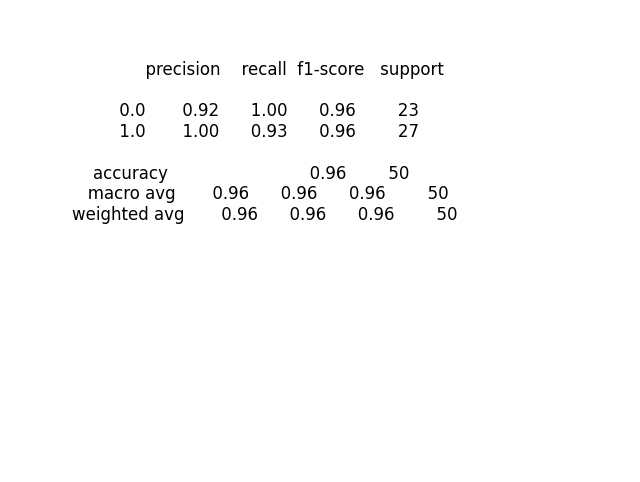

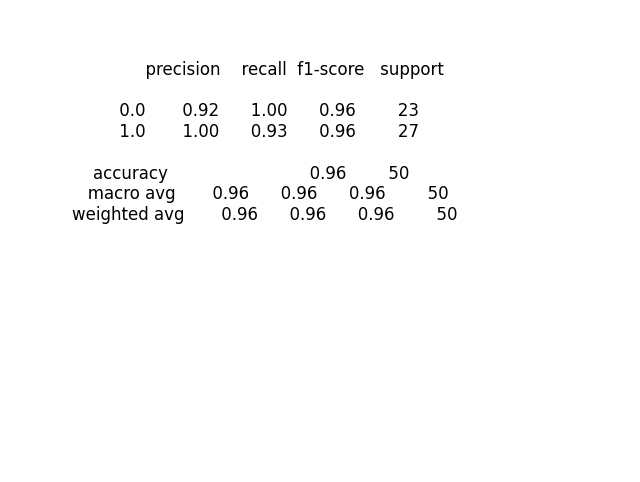

In [26]:
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
from IPython.display import Image, display

# Assuming y_pred and y_test are your predicted and true labels
# Replace these with your actual data

# Generate the classification report as text
report_text = classification_report(y_test, y_pred)

# Create a plot from the text
fig, ax = plt.subplots(figsize=(8, 6))
ax.text(0.1, 0.5, report_text, fontsize=12)
ax.axis('off')  # Turn off axis

# Save the plot as an image file
image_path = '/content/classification_report.png'  # Change the path as needed
plt.savefig(image_path, bbox_inches='tight')

# Display the saved image
display(Image(filename=image_path))


In [27]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         0.0       0.92      1.00      0.96        23
         1.0       1.00      0.93      0.96        27

    accuracy                           0.96        50
   macro avg       0.96      0.96      0.96        50
weighted avg       0.96      0.96      0.96        50



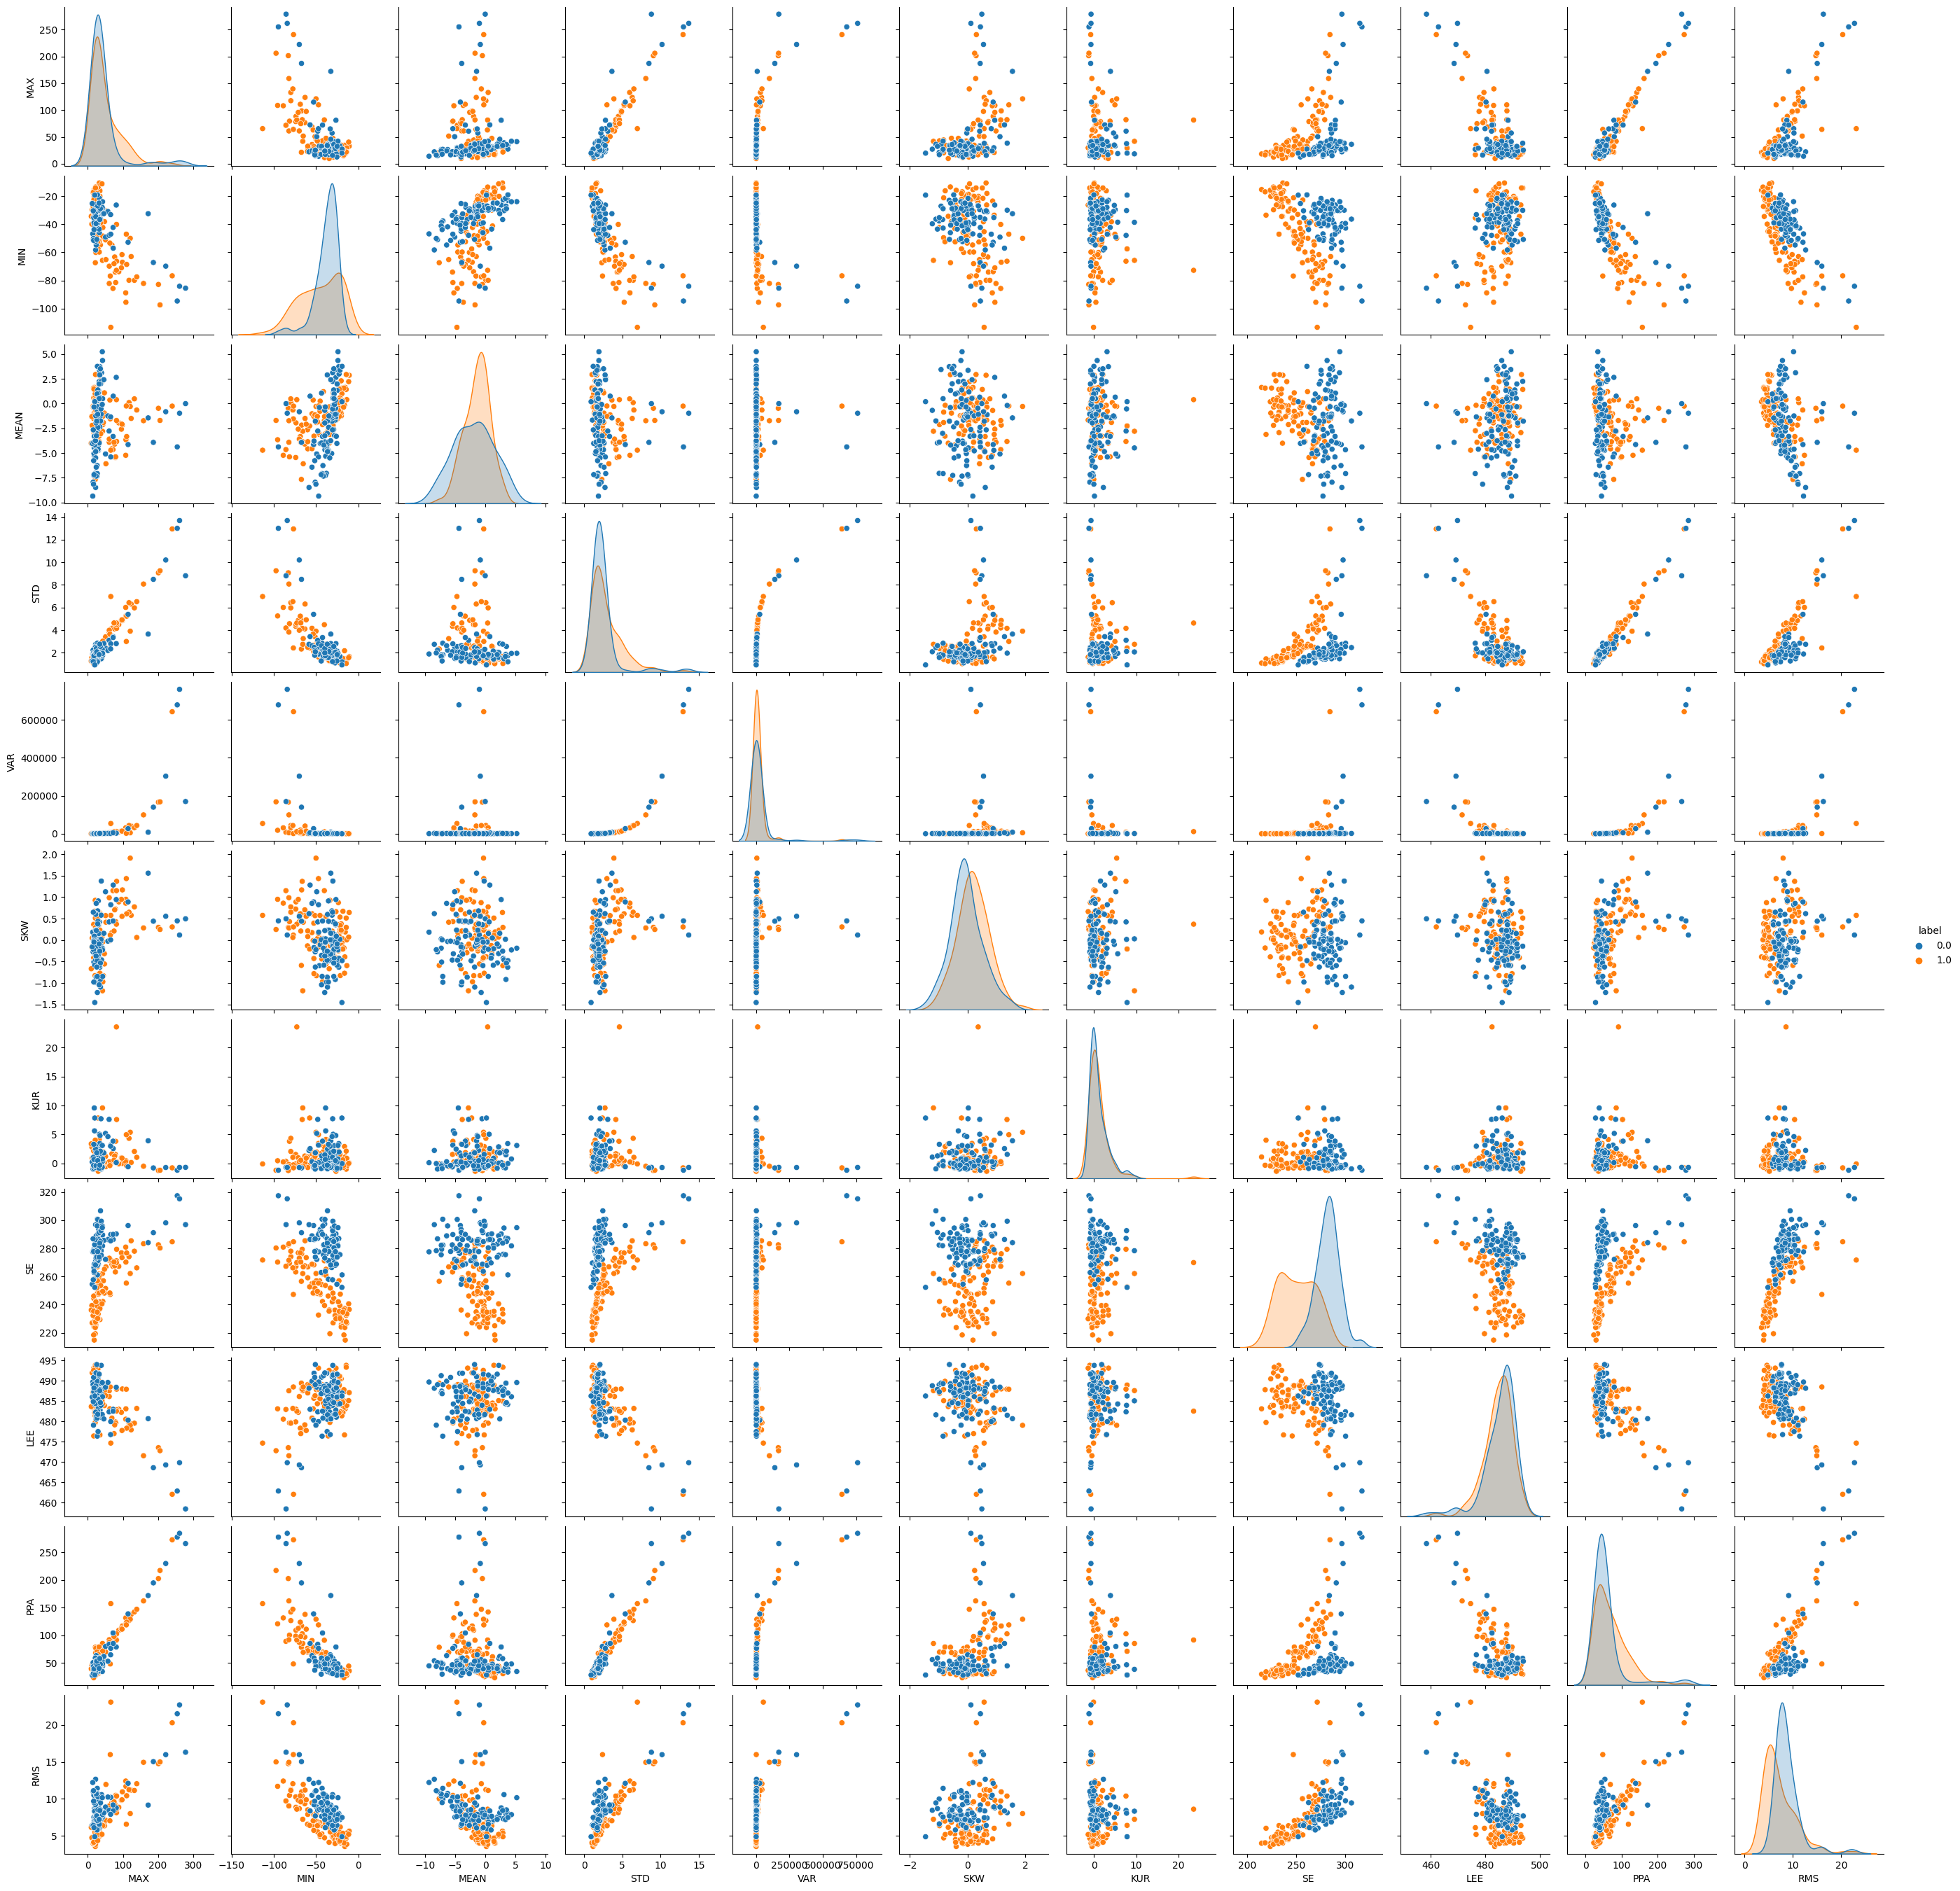

In [28]:
#EDA
sns.pairplot(EEG_Features, hue='label')

In [29]:
EEG_Features.corr()

,MAX,MIN,MEAN,STD,VAR,SKW,KUR,SE,LEE,PPA,RMS,label
MAX,1.000000,-0.662625,0.015237,0.940017,0.736829,0.394630,-0.012353,0.383887,-0.744947,0.963726,0.734655,0.076815
MIN,-0.662625,1.000000,0.439974,-0.770633,-0.415123,-0.332421,-0.075403,-0.381033,0.465255,-0.772384,-0.762990,-0.198711
MEAN,0.015237,0.439974,1.000000,-0.119986,-0.010209,-0.087321,0.032776,-0.228685,0.090750,-0.121164,-0.361938,0.105858
STD,0.940017,-0.770633,-0.119986,1.000000,0.807346,0.328565,-0.041290,0.408402,-0.745700,0.966764,0.819474,0.113532
VAR,0.736829,-0.415123,-0.010209,0.807346,1.000000,0.105941,-0.124976,0.286327,-0.607877,0.749839,0.654664,-0.034329
SKW,0.394630,-0.332421,-0.087321,0.328565,0.105941,1.000000,0.068778,0.013665,-0.225439,0.372118,0.205954,0.212776
KUR,-0.012353,-0.075403,0.032776,-0.041290,-0.124976,0.068778,1.000000,0.029183,0.038892,-0.007275,-0.078344,0.014874
SE,0.383887,-0.381033,-0.228685,0.408402,0.286327,0.013665,0.029183,1.000000,-0.282688,0.387576,0.656541,-0.715635
LEE,-0.744947,0.465255,0.090750,-0.745700,-0.607877,-0.225439,0.038892,-0.282688,1.000000,-0.718689,-0.600211,-0.061004
PPA,0.963726,-0.772384,-0.121164,0.966764,0.749839,0.372118,-0.007275,0.387576,-0.718689,1.000000,0.781135,0.123000
